In [ ]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import tensorflow as tf                                       

# Initialing the CNN
classifier = Sequential()


# Step 1 - Convolutio Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#Adding 3rd Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size =(2,2),padding='same'))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = tf.keras.optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'mydata/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'mydata/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=500,
        epochs=25,
        validation_data = test_set,
        validation_steps = len(test_set)//32,
      )


# import h5py
# classifier.save('Trained_model.h5')


In [1]:
from keras.models import load_model
model = load_model('Trained_model.h5')

In [16]:
import numpy as np
history=np.load('my_history.npy',allow_pickle='TRUE').item()
history

{'loss': [2.2930095195770264,
  2.2284274101257324,
  1.8711003065109253,
  1.4090772867202759,
  1.0950158834457397,
  0.8468057513237,
  0.7068429589271545,
  0.5992374420166016,
  0.5451366901397705,
  0.49328264594078064,
  0.45388537645339966,
  0.4194527566432953,
  0.38330191373825073,
  0.36169523000717163,
  0.3364591598510742,
  0.3299289047718048,
  0.2993573546409607,
  0.2933131754398346,
  0.27646228671073914,
  0.2609780728816986,
  0.25660261511802673,
  0.24253448843955994,
  0.23658205568790436,
  0.22953756153583527,
  0.21894077956676483],
 'accuracy': [0.15535134077072144,
  0.2216804176568985,
  0.3132658302783966,
  0.4733058214187622,
  0.6042760610580444,
  0.7022380828857422,
  0.7495623826980591,
  0.7910727858543396,
  0.8068267107009888,
  0.8288947343826294,
  0.8388347029685974,
  0.8529999852180481,
  0.866841733455658,
  0.8771567940711975,
  0.8835333585739136,
  0.8872500061988831,
  0.8985371589660645,
  0.897724449634552,
  0.9044761061668396,
  0.9

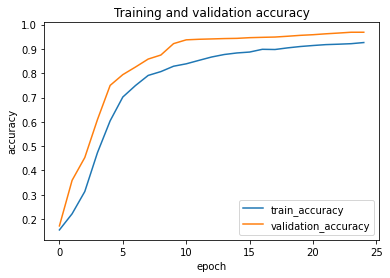

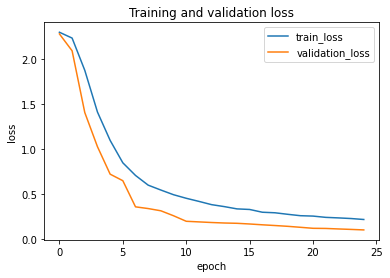

In [17]:
import matplotlib.pyplot as plt
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history['accuracy']) 
    plt.plot(history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Training and validation accuracy')
plot_loss(history,'Training and validation loss')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        